In [56]:
import matplotlib.pyplot as plt
import torch
import sys
from sklearn.externals import joblib
sys.path.append('/data1/jiaxuan/2019')

import numpy as np
from Optimizer.lib.evaluation import plot_best, plot_best_test

def plot_tracker(track, param_index):
    ntrack = len(track[param_index]['grad'])

    for i in range(ntrack):
        g = np.array(track[param_index]['grad'][i])
        plt.plot(g)
    plt.title('{} randomly tracked gradient over time'.format(ntrack))
    plt.show()

    for i in range(ntrack):
        g = np.array(track[param_index]['param'][i])
        plt.plot(g)
    plt.title('{} randomly tracked parameters over time'.format(ntrack))
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['param'][i])
        diff = p[1:] - p[:-1]
        plt.semilogy(np.abs(diff)) # negative b/c gradient "descent"
    plt.title('step size')
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['alpha_ratio'][i])
        #plt.semilogy(p)
        plt.plot(p)
    plt.title('alpha ratio (smaller uses more curvature)')
    plt.show()

    for i in range(ntrack):
        p = np.array(track[param_index]['feature_step'][i])
        plt.plot(p)
    plt.title('feature steps (# times cross 0)')
    plt.show()
    
    for i in range(ntrack):
        p = np.array(track[param_index]['lr'][i])
        plt.semilogy(p)
    plt.title('learning rate')
    plt.show()

In [685]:
# plot cifar 100
def load_log(path):
    with open(path) as fn:
        lines = fn.readlines()
        headers, rest = lines[0].rstrip().split('\t'), lines[1:]
        res = dict((h, []) for h in headers)
        for l in rest:
            for h, v in zip(headers, map(float, l.rstrip().split('\t'))):
                res[h].append(v)
    return res

# dict_keys(['Valid Loss', 'Valid Acc.', 'Train Acc.', 'Train Loss', 'Learning Rate'])

def plot_cifar(data_paths, key='Valid Acc.', title=None, ylabel=None, labels=None):
    for i,p in enumerate(data_paths):
        log = load_log(p)
        if labels is None:
            plt.plot(log[key], label=p.split('/')[-2].split('-')[-1])
        else:
            plt.plot(log[key], label=labels[i].split('-')[-1])

    title = title or "CIFAR-100 Experiment"
    ylabel = ylabel or key
    plt.title(title, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Epochs', fontsize=15)
    plt.show()

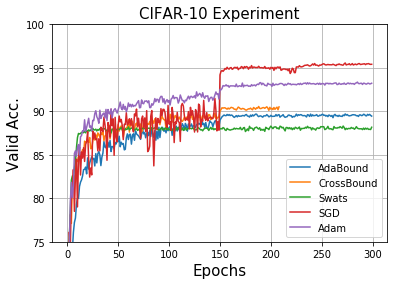

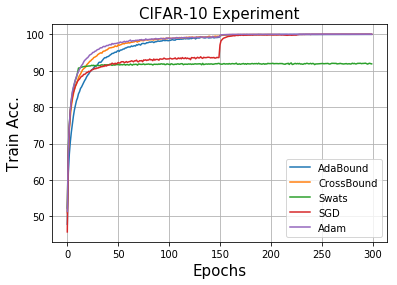

In [722]:
data_paths = ['../cifar100/checkpoints/cifar10/densenet-bc-100-12-AdaBound-[150, 225]/log.txt', 
              '../cifar100/checkpoints/cifar10/densenet-bc-100-12-CrossBound-[150, 225]/log.txt',
              '../cifar100/checkpoints/cifar10/densenet-bc-100-12-Swats-[150, 225]/log.txt',
              '../cifar100/checkpoints/cifar10/densenet-bc-100-12-SGD-[150, 225]/log.txt',
              '../cifar100/checkpoints/cifar10/densenet-bc-100-12-Adam-[150, 225]/log.txt'
             ]

plt.ylim([75, 100])
labels = ['AdaBound', 'CrossBound', 'Swats', 'SGD', 'Adam']
title = 'CIFAR-10 Experiment'
plot_cifar(data_paths, labels=labels, title=title)
plot_cifar(data_paths, key='Train Acc.', labels=labels, title=title)

# plot_tracker(joblib.load('../cifar100/checkpoints/cifar10/densenet-bc-100-12-CrossBound-[150, 225]/opt_track.pkl'), 10)

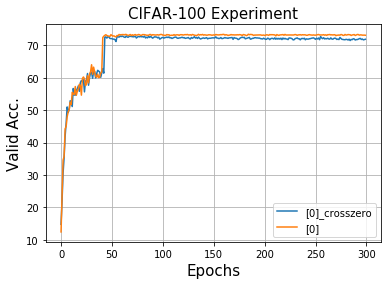

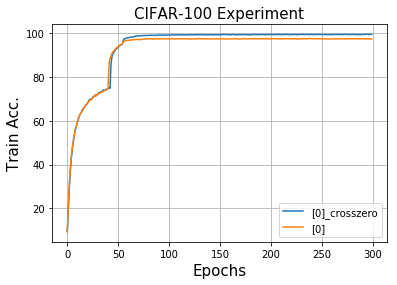

In [719]:
# data_paths = ['../cifar100/checkpoints/cifar100/densenet-bc-100-12-[150, 225]_crosszero/log.txt', 
#               '../cifar100/checkpoints/cifar100/densenet-bc-100-12-[150, 225]/log.txt']
# data_paths = ['../cifar100/checkpoints/cifar100/densenet-bc-100-12-[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_crosszero/log.txt',
#              '../cifar100/checkpoints/cifar100/densenet-bc-100-12-[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]/log.txt']
# data_paths = ['../cifar100/checkpoints/cifar100/densenet-bc-100-12-[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]_crosszero/log.txt', 
#               '../cifar100/checkpoints/cifar100/densenet-bc-100-12-[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]/log.txt']
# data_paths = ['../cifar100/checkpoints/cifar100/densenet-bc-100-12-[30, 60, 90, 120, 150, 180]_crosszero/log.txt', 
#               '../cifar100/checkpoints/cifar100/densenet-bc-100-12-[30, 60, 90, 120, 150, 180]/log.txt']
data_paths = ['../cifar100/checkpoints/cifar100/densenet-bc-100-12-[0]_crosszero/log.txt', 
              '../cifar100/checkpoints/cifar100/densenet-bc-100-12-[0]/log.txt']

plot_cifar(data_paths)
plot_cifar(data_paths, key='Train Acc.')

# plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-[150, 225]_crosszero/opt_track.pkl'), 10)
# plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-[30, 60, 90, 120, 150, 180]_crosszero/opt_track.pkl'), 10)
# plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_crosszero/opt_track.pkl'), 10)
# plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]_crosszero/opt_track.pkl'), 10)
# plot_tracker(joblib.load('../cifar100/checkpoints/cifar100/densenet-bc-100-12-[0]_crosszero/opt_track.pkl'), 0)

# 2d ellipse data

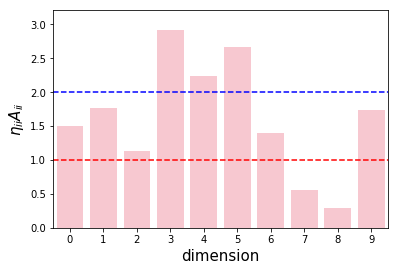

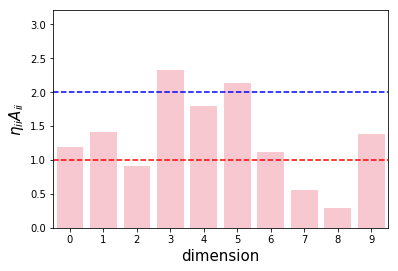

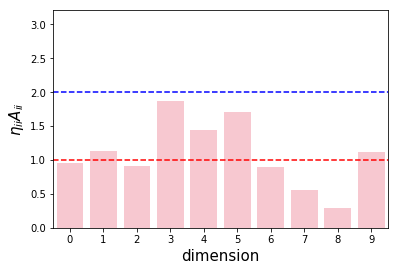

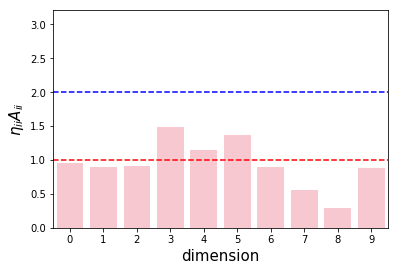

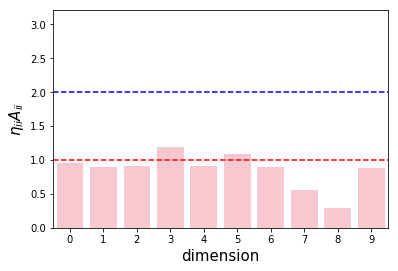

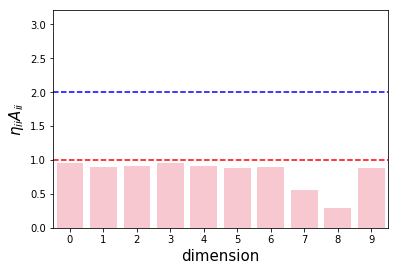

In [680]:
import seaborn as sns
import pandas as pd

eta_A = np.abs(np.random.randn(10)) * 1.5
gamma = 0.8
max_eta_A = max(eta_A) * 1.1

while (eta_A > 1).sum() > 0:
    data = {'eta_A': eta_A, 'x': np.arange(len(eta_A)) }
    sns.barplot(x='x', y='eta_A', data=pd.DataFrame(data), color='pink')
    plt.axhline(1, linestyle='--', color='red')
    plt.axhline(2, linestyle='--', color='blue')
    plt.ylim([0, max_eta_A])
    plt.ylabel('$\eta_{ii} A_{ii}$', fontsize=15)
    plt.xlabel('dimension', fontsize=15)
    plt.show()
    
    eta_A[eta_A > 1] *= gamma
    
data = {'eta_A': eta_A, 'x': np.arange(len(eta_A)) }
sns.barplot(x='x', y='eta_A', data=pd.DataFrame(data), color='pink')
plt.axhline(1, linestyle='--', color='red')
plt.axhline(2, linestyle='--', color='blue')
plt.ylim([0, max_eta_A])
plt.ylabel('$\eta_{ii} A_{ii}$', fontsize=15)
plt.xlabel('dimension', fontsize=15)
plt.show()

    

In [375]:
%load_ext autoreload
%autoreload 2

In [220]:
def gen_loss(scale_x=1, scale_y=1, theta=0):
    # assume degree theta
    theta = theta / 180 * np.pi 
    S = np.array([[scale_x, 0], 
                  [0, scale_y]]) 
    T = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])
    M = torch.from_numpy(T.dot(S).dot(T.T)).float()
    
    # x is n by d, here d=2
    def res(x):
        return (x.mm(M) * x).sum(1)
    return res


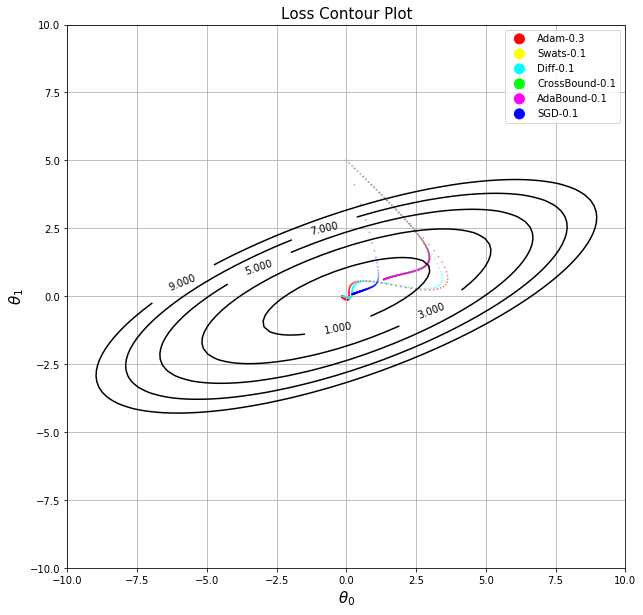

In [628]:
import numpy as np
import matplotlib.pyplot as plt
from Optimizer.lib import optimizer as optimizers
from Optimizer.lib.utils import OptRecorder

def drawContour(f, name, c='k', r=(-10,10), levels=None):
    a, b = r
    xlist = np.linspace(a, b, 100)
    ylist = np.linspace(a, b, 100)
    X, Y = np.meshgrid(xlist, ylist)
    cp = plt.contour(X, Y, f(X, Y), levels=levels, colors=c)
    plt.clabel(cp, inline=True, fontsize=10)
    plt.title(name + ' Contour Plot', fontsize=15)
    plt.xlabel(r'$\theta_{0}$', fontsize=15)
    plt.ylabel(r'$\theta_{1}$', fontsize=15)

def Loss(criteria): 
    def loss_(X, Y):
        x = torch.from_numpy(np.vstack([X.ravel(), Y.ravel()]).T).float()
        return criteria(x).data.cpu().numpy().reshape(X.shape[0], X.shape[1])
    return loss_

class OptPath():
    
    def get_path(self, criteria, x0, niter=1000, lr=1e-3, opt=torch.optim.SGD, 
                 schedule=None, gamma=0.1, crosszero=False, **kwargs):
        self.lr = lr
        self.kwargs = kwargs
        self.schedule = schedule
        self.gamma = gamma
        self.crosszero = crosszero
        self.validation_decay = schedule is not None and 0 in schedule
        
        x_path = [x0]    
        x = torch.nn.Parameter(torch.from_numpy(x0).float().view(1, -1))
        optimizer = opt([x], lr=lr, **kwargs)
        self.opt = optimizer
        self.opt_recorder = OptRecorder(optimizer)
        if self.validation_decay:
            self.lr_decay = optimizers.LR_reduce_validation(lr, gamma, optimizer, crosszero, use_max=False)
        else:
            self.lr_decay = optimizers.LR_schedule_fixed(lr, schedule, gamma, optimizer, crosszero)
            
        for i in range(niter):
            optimizer.zero_grad()
            l = criteria(x)
            l.backward()
            optimizer.step()
            x_path.append(x.data.cpu().clone().numpy().ravel())
            if schedule is not None:
                if self.validation_decay:
                    self.lr_decay.adjust_learning_rate(optimizer, l.data.item())
                else:
                    self.lr_decay.adjust_learning_rate(optimizer, i)
            if niter % int(niter/10) == 0:
                self.opt_recorder.record()
        
        x_path = np.vstack(x_path).T
        self.x_path = x_path
    
    def draw_path(self, path=None, s=1, color=[1,0,1], name=None, line=False):
        if path is None:
            path = self.x_path
        if name is None:
            name = str(self.opt).split("(")[0].strip() + "-" + str(self.lr)
            if self.schedule is not None and self.crosszero:
                name += "-crosszero"
        n = len(path[0])
        colors = np.ones((n, 1)).dot(np.array([color + [1]]))
        colors[:,3] = np.linspace(0.2, 1, n)
        if line:
            plt.plot(path[0], path[1], c=color, label=name)
        else:
            plt.scatter(path[0], path[1], s=s, c=colors, label=name)
            
    def draw_error(self, path=None, color=[1,0,1], name=None):
        if path is None: path =self.x_path
        if name is None:
            name = str(self.opt).split("(")[0].strip() + "-" + str(self.lr)
            if self.schedule is not None and self.crosszero:
                name += "-crosszero"            
        d = np.sqrt(path[0]**2 + path[1]**2)
        plt.plot(d, '-o', color=color, markersize=1, lw=0.5, label=name)
            
opt_path = OptPath()
criteria = gen_loss(0.1, 1, 20)
niter = 100
x0 = np.array([0, 5])

opt_path.get_path(criteria, x0, niter=niter, lr=0.3, opt=torch.optim.Adam)
opt_path.draw_path(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.Swats)
opt_path.draw_path(color=[1,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.Diff)
opt_path.draw_path(color=[0,1,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.CrossBound)
opt_path.draw_path(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.AdaBound)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=torch.optim.SGD)
opt_path.draw_path(color=[0,0,1])

# main drawing
drawContour(Loss(criteria), "Loss", levels=[1,3,5,7,9])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

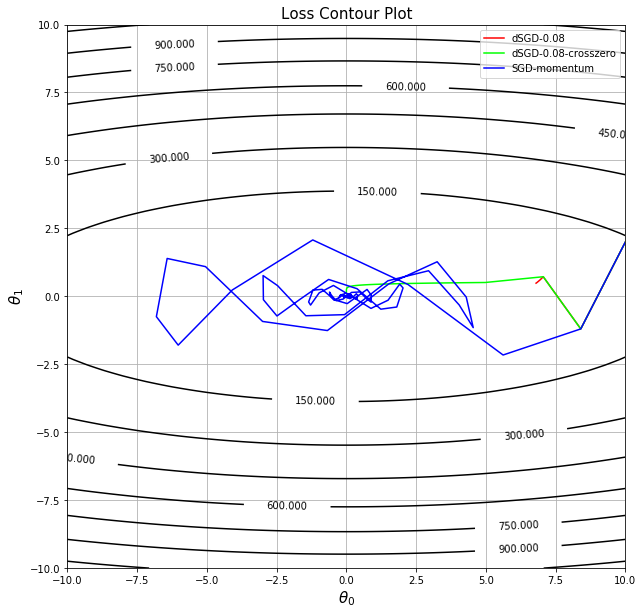

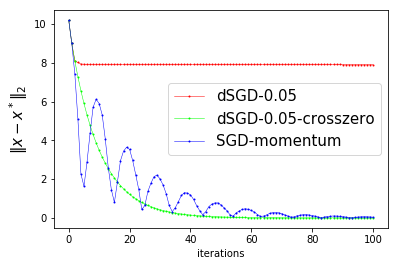

In [654]:
opt_path = OptPath()
criteria = gen_loss(1, 10, 0)
niter = 100
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.08, opt=optimizers.dSGD, 
                  schedule=[1, 3, 5, 7], crosszero=False, momentum=0)
opt_path.draw_path(color=[1,0,0], line=True)

opt_path.get_path(criteria, x0, niter=niter, lr=0.08, opt=optimizers.dSGD, 
                  schedule=[1, 3, 5, 7], crosszero=True, momentum=0)
opt_path.draw_path(color=[0,1,0], line=True)

opt_path.get_path(criteria, x0, niter=niter, lr=0.08, opt=torch.optim.SGD, momentum=0.9)
opt_path.draw_path(color=[0,0,1], line=True, name="SGD-momentum")

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

opt_path.get_path(criteria, x0, niter=niter, lr=0.05, opt=optimizers.dSGD, 
                  schedule=[1, 3, 5, 7], crosszero=False, momentum=0)
opt_path.draw_error(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.05, opt=optimizers.dSGD, 
                  schedule=[1, 3, 5, 7], crosszero=True, momentum=0)
opt_path.draw_error(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.05, opt=torch.optim.SGD, momentum=0.9)
opt_path.draw_error(color=[0,0,1], name="SGD-momentum")

plt.ylabel(r"$\Vert x - x^* \Vert_2$", fontsize=15)
plt.xlabel('iterations')
plt.legend(fontsize=15)
plt.show()

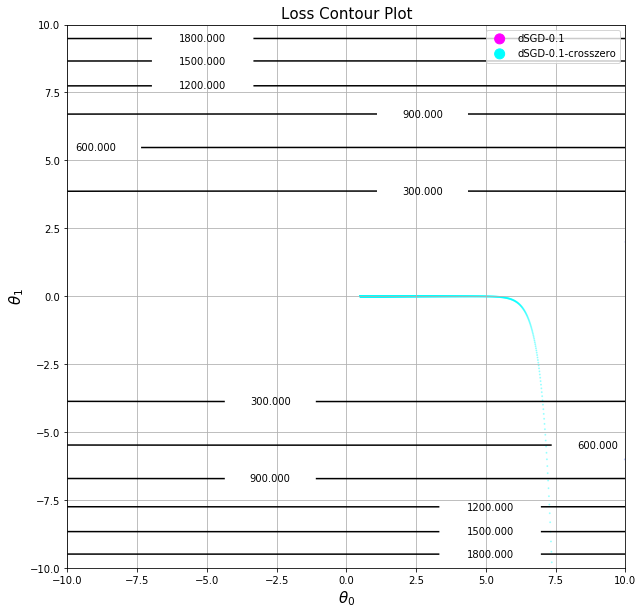

In [557]:
opt_path = OptPath()
criteria = gen_loss(0.01, 20, 0)
niter = 1500
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.dSGD, 
                  schedule=[0], crosszero=False)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=optimizers.dSGD, 
                  schedule=[0], crosszero=True)
opt_path.draw_path(color=[0,1,1])

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

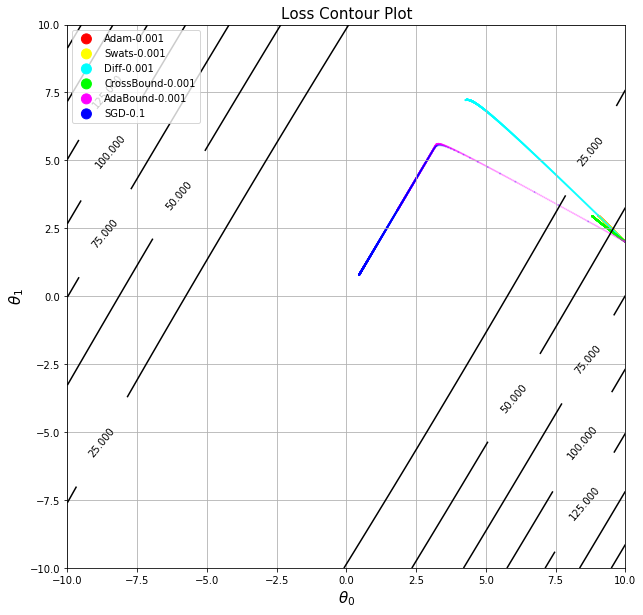

In [454]:
opt_path = OptPath()
criteria = gen_loss(0.01, 1, 60)
niter = 1000
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=torch.optim.Adam)
opt_path.draw_path(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Swats)
opt_path.draw_path(color=[1,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Diff)
opt_path.draw_path(color=[0,1,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.CrossBound)
opt_path.draw_path(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.AdaBound)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=torch.optim.SGD)
opt_path.draw_path(color=[0,0,1])

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

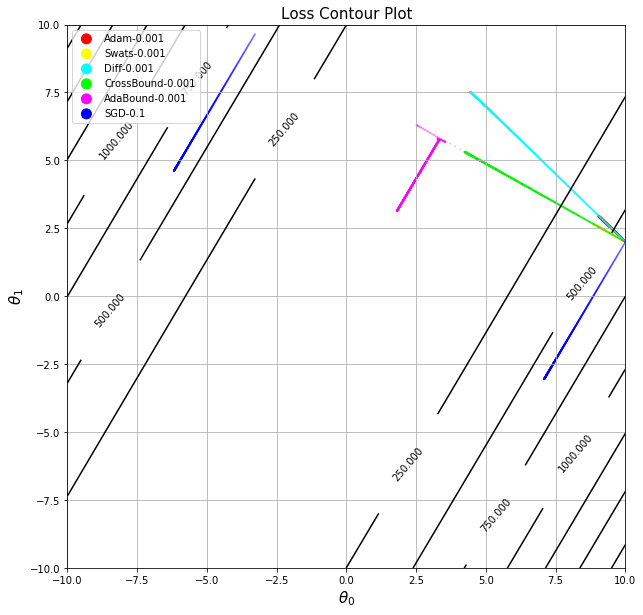

In [455]:
opt_path = OptPath()
criteria = gen_loss(0.01, 10, 60)
niter = 1000
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=torch.optim.Adam)
opt_path.draw_path(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Swats)
opt_path.draw_path(color=[1,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Diff)
opt_path.draw_path(color=[0,1,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.CrossBound)
opt_path.draw_path(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.AdaBound)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=torch.optim.SGD)
opt_path.draw_path(color=[0,0,1])

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

For learning rate decay, use this SGD example, we want to decay learning rate of 1 direction, not both. Following this story line, we motivate different learning rate for different parameters (differennt decay for different parameters also). Then I show that in axis aligned quadratic case, cross zero lowers condition number (not a theorem, but build intuition). 

Then we show real dataset result with this trick (assume it works). Then we move on to claim that this heuristic can be applied for other settings as well, e.g., learning when to switch from Adam to SGD (no need to motivate this, just mention related work on Swats and AdaBound). Our assumption is that Adam is faster at the initial state of learning, and switching gradient is caused either by a) stochastic gradient b) hitting boundary. In case a), we claim that we want to switch to SGD to avoid divergence caused by "Adagrad" paper. In case b), we claim that as long as hitting boundary doesn't cause validation error to stuck or increase (in which case we decay learning rate to ensure convergence), we should gradually transition to SGD for its better convergence properties (here no proof as in general unsure what this leads to).

In the ideal world, we should that Cross Zero + AdaBound + learning rate decay trains faster and better. Theoretically I need to verify different learning rate would not cause divergence to AdaBound proof. 

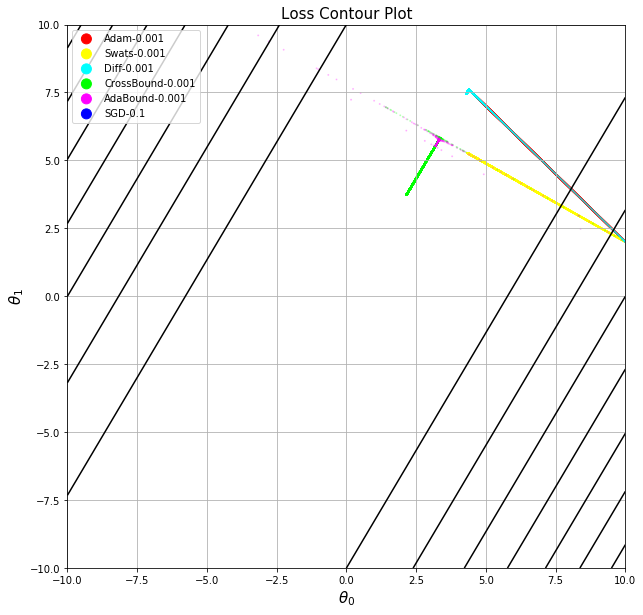

In [458]:
opt_path = OptPath()
criteria = gen_loss(0.01, 1000, 60)
niter = 10000
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=torch.optim.Adam)
opt_path.draw_path(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Swats)
opt_path.draw_path(color=[1,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Diff)
opt_path.draw_path(color=[0,1,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.CrossBound)
opt_path.draw_path(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.AdaBound)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=torch.optim.SGD)
opt_path.draw_path(color=[0,0,1])

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

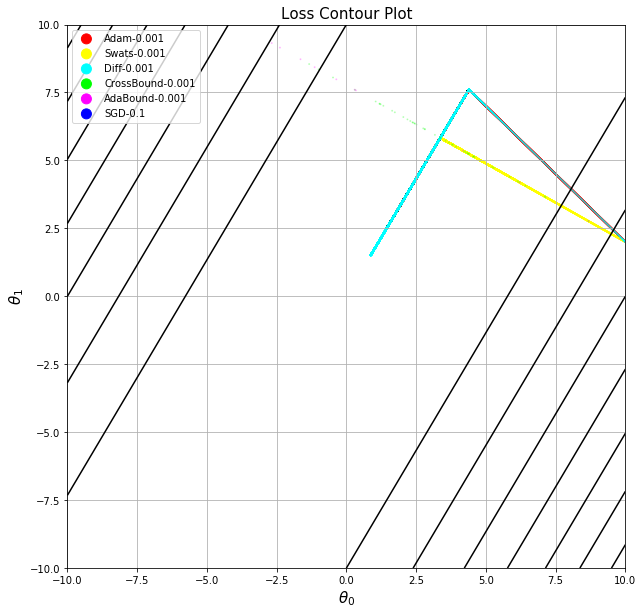

In [457]:
opt_path = OptPath()
criteria = gen_loss(0.01, 10000, 60)
niter = 50000
x0 = np.array([10, 2])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=torch.optim.Adam)
opt_path.draw_path(color=[1,0,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Swats)
opt_path.draw_path(color=[1,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.Diff)
opt_path.draw_path(color=[0,1,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.CrossBound)
opt_path.draw_path(color=[0,1,0])

opt_path.get_path(criteria, x0, niter=niter, lr=0.001, opt=optimizers.AdaBound)
opt_path.draw_path(color=[1,0,1])

opt_path.get_path(criteria, x0, niter=niter, lr=0.1, opt=torch.optim.SGD)
opt_path.draw_path(color=[0,0,1])

# main drawing
drawContour(Loss(criteria), "Loss")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.grid()
leg = plt.legend(markerscale=10)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

# Analysis

Playing around with this synthetic dataset is fun. We observe the following

1. To fail SGD, you just increase the condition number, as that will mess up with learning rate a lot
2. AdaBound is more robust to condition number, but you increase condition number enough, it fails
3. CrossBound takes more hit, but will fail again if conditional number again increases
4. Adam is indeed robust to these changes

Also, oscillation should be handled by learning rate decay instead of SGD or Adam. It just says I'm near destination and you should use SGD to get to a generalizable point. 